In [1]:
import numpy as np
import pandas as pd
import json
from datetime import datetime, timedelta
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, deque
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score

K = 2, Silhouette Score = 0.1272
K = 3, Silhouette Score = 0.1134
K = 4, Silhouette Score = 0.1112
K = 5, Silhouette Score = 0.1144
K = 6, Silhouette Score = 0.1166
K = 7, Silhouette Score = 0.1222
K = 8, Silhouette Score = 0.1145
K = 9, Silhouette Score = 0.1215


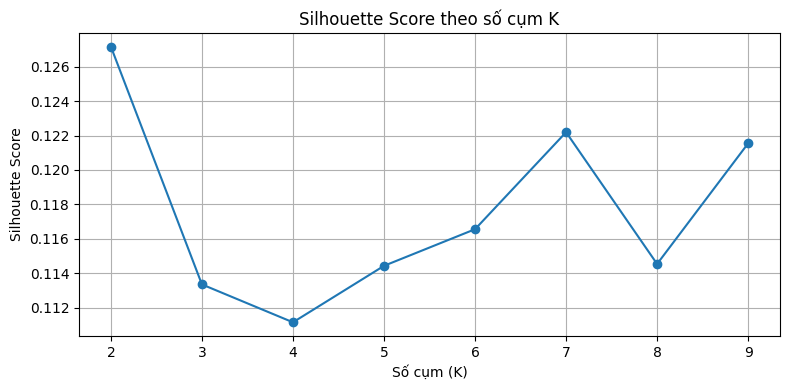

✅ Số cụm tốt nhất: 2
✅ Đã lưu kết quả phân cụm vào file feature_vectors_clustered.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# ---- STEP 1: Load dữ liệu ----
df = pd.read_csv("feature_vectors_expanded.csv")

# ---- STEP 2: Lựa chọn feature (loại bỏ những cột không phù hợp để phân cụm) ----
features = df.drop(columns=['userid', 'courseid', 'max_time_diff', 'forum_access', 'quiz_access', 'hvp_access'])

# ---- STEP 3: Chuẩn hoá dữ liệu với StandardScaler ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# ---- STEP 4: Tìm số cụm tối ưu bằng Silhouette Score ----
sil_scores = []
k_range = range(2, 10)  # Chỉ xét K=2 và K=3

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)
    print(f"K = {k}, Silhouette Score = {score:.4f}")

# ---- STEP 5: Vẽ biểu đồ Silhouette Score theo K ----
plt.figure(figsize=(8, 4))
plt.plot(k_range, sil_scores, marker='o')
plt.title("Silhouette Score theo số cụm K")
plt.xlabel("Số cụm (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---- STEP 6: Chọn số cụm tốt nhất ----
best_k = k_range[sil_scores.index(max(sil_scores))]
print(f"✅ Số cụm tốt nhất: {best_k}")

# ---- STEP 7: Phân cụm với số cụm tốt nhất ----
final_model = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
cluster_labels = final_model.fit_predict(X_scaled)

# ---- STEP 8: Gắn nhãn cụm vào DataFrame và lưu ra file mới ----
df['cluster'] = cluster_labels
df.to_csv("feature_vectors_clustered.csv", index=False)
print("✅ Đã lưu kết quả phân cụm vào file feature_vectors_clustered.csv")

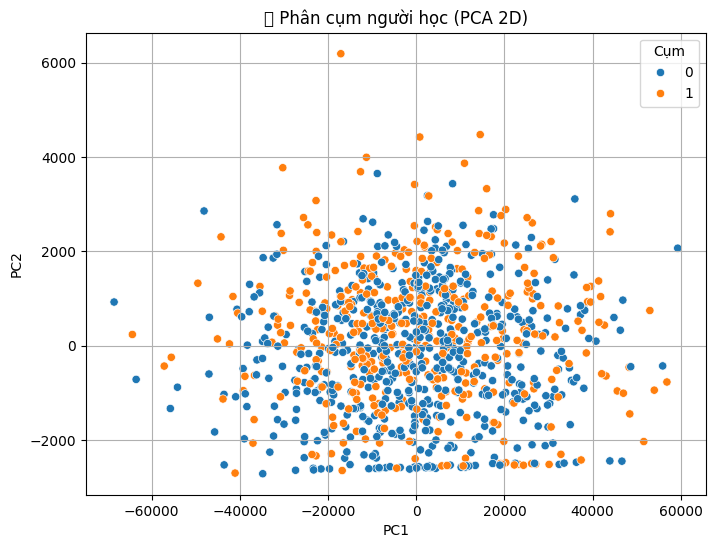

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# --- Load file kết quả phân cụm ---
df = pd.read_csv("feature_vectors_clustered.csv")

# --- Bỏ cột không cần trực quan hoá ---
feature_cols = df.columns.difference(['userid', 'courseid', 'cluster'])
X = df[feature_cols]
clusters = df['cluster']

# --- PCA để giảm chiều về 2D ---
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)

df['PC1'] = X_2d[:, 0]
df['PC2'] = X_2d[:, 1]

# --- Vẽ biểu đồ 2D ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='cluster', palette='tab10')
plt.title("📊 Phân cụm người học (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cụm')
plt.grid(True)
plt.show()

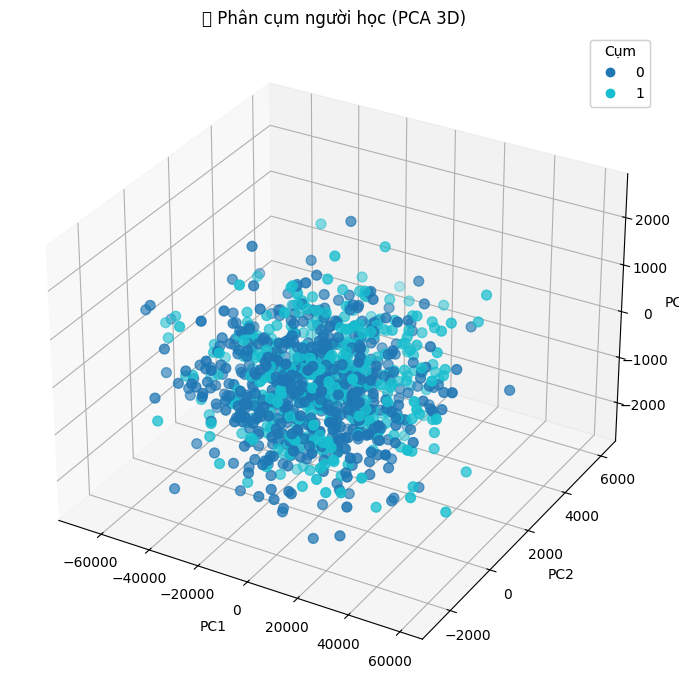

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # cần import để vẽ 3D
import seaborn as sns

# --- Load dữ liệu đã phân cụm ---
df = pd.read_csv("feature_vectors_clustered.csv")

# --- Bỏ cột không cần trực quan hóa ---
feature_cols = df.columns.difference(['userid', 'courseid', 'cluster'])
X = df[feature_cols]
clusters = df['cluster']

# --- PCA giảm chiều về 3D ---
pca_3d = PCA(n_components=3)
X_3d = pca_3d.fit_transform(X)

df['PC1'] = X_3d[:, 0]
df['PC2'] = X_3d[:, 1]
df['PC3'] = X_3d[:, 2]

# --- Vẽ biểu đồ 3D ---
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['PC1'], df['PC2'], df['PC3'],
    c=clusters, cmap='tab10', s=50
)

# --- Thêm nhãn và tiêu đề ---
ax.set_title("🧠 Phân cụm người học (PCA 3D)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

# --- Thêm chú thích màu cho từng cụm ---
legend = ax.legend(*scatter.legend_elements(), title="Cụm")
ax.add_artist(legend)

plt.tight_layout()
plt.show()

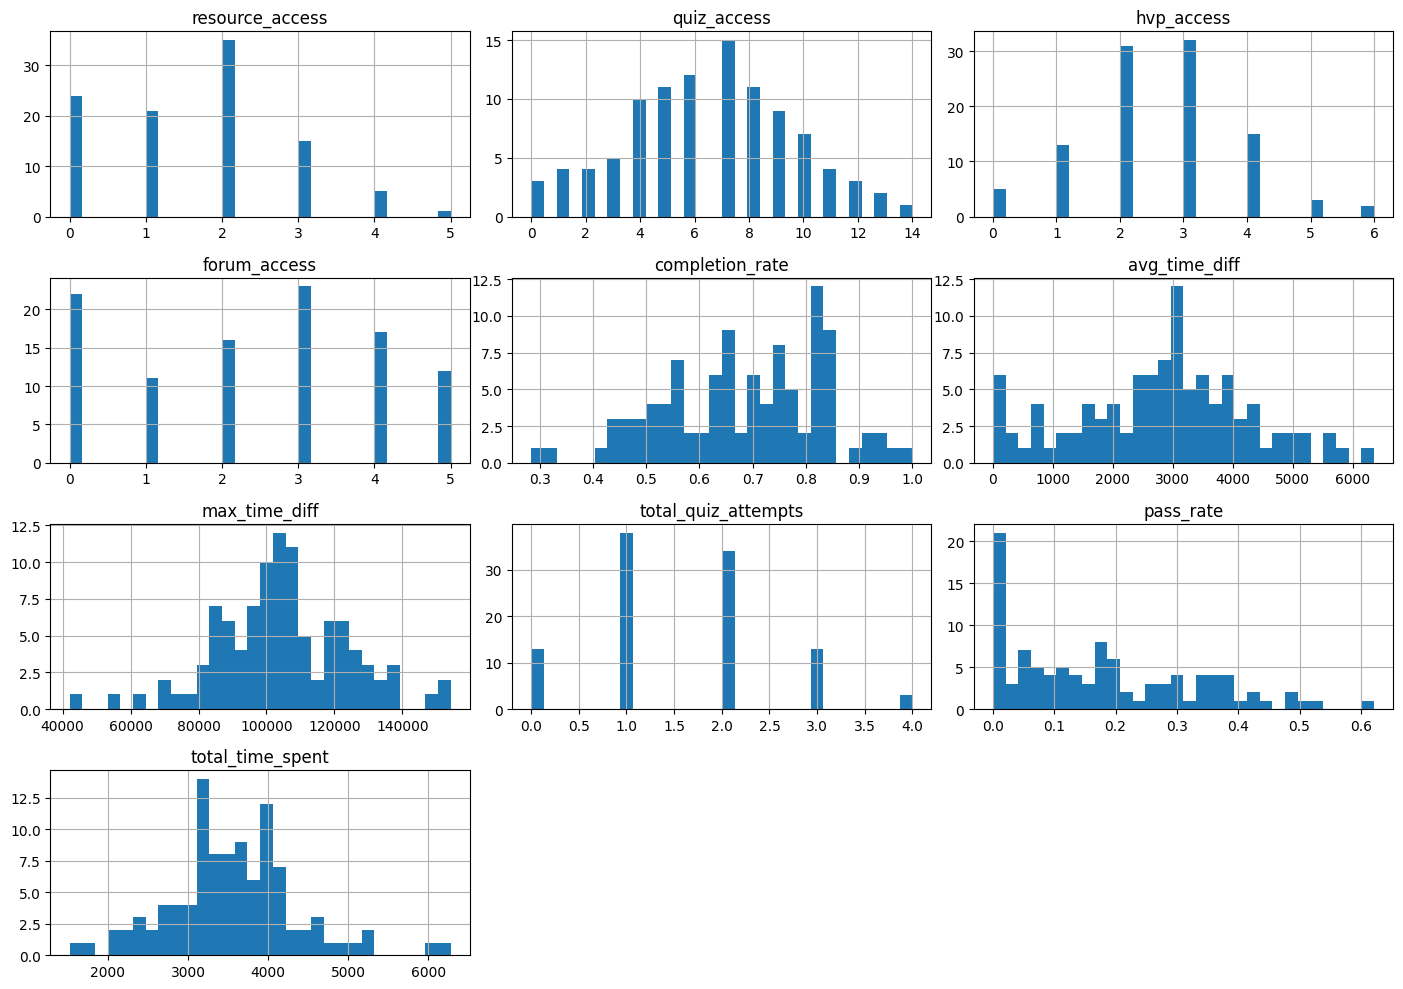

In [7]:
import matplotlib.pyplot as plt

df = pd.read_csv("feature_vectors_expanded.csv")

df.drop(columns=['userid', 'courseid']).hist(bins=30, figsize=(14, 10))
plt.tight_layout()
plt.show()